# Week 10 Independent Lab: Decision Trees  
**Author:** T.J. Greenberg  
**Course:** BGEN632  
**Professor:** Dr. Olivia B. Newton  
**Date:** May 5, 2025  



---
 
# Week 10 Independent Lab: Decision Trees

In this lab, we apply supervised machine learning — specifically, decision trees — to explore operational trends across California hospitals.

We use classification and regression trees to model both continuous outcomes (e.g., revenue, income) and categorical labels (e.g., ownership type).    
The dataset reflects a mix of financial, staffing, and structural attributes. Each tree highlights the drivers that most clearly explain the hospital outcome in question.  

> **Goal:** Interpret and visualize patterns across hospital types using consistent, interpretable tree-based models..


## Environment Setup  
To complete this lab, we use Python libraries including `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`. These tools allow us to manipulate data, create decision tree models, and visualize results

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

## Step 1: Load and Prepare Data

We’ll use only the provided `calihospital.txt` file. No additional data imports are required for this lab.

> Note: This dataset is tab-delimited. Make sure to set the separator correctly when importing.


In [25]:
# Load and inspect the dataset (tab-delimited)
df = pd.read_csv("data/calihospital.txt", sep="\t")
df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


## Step 2: Regression Tree – Operating Income
We predict **Operating Income** using a mix of financial and staffing predictors.

- **Target:** `OperInc`  
- **Features:** `AvlBeds`, `NoFTE`, `Teaching`  

We include at least one categorical and one numerical variable.

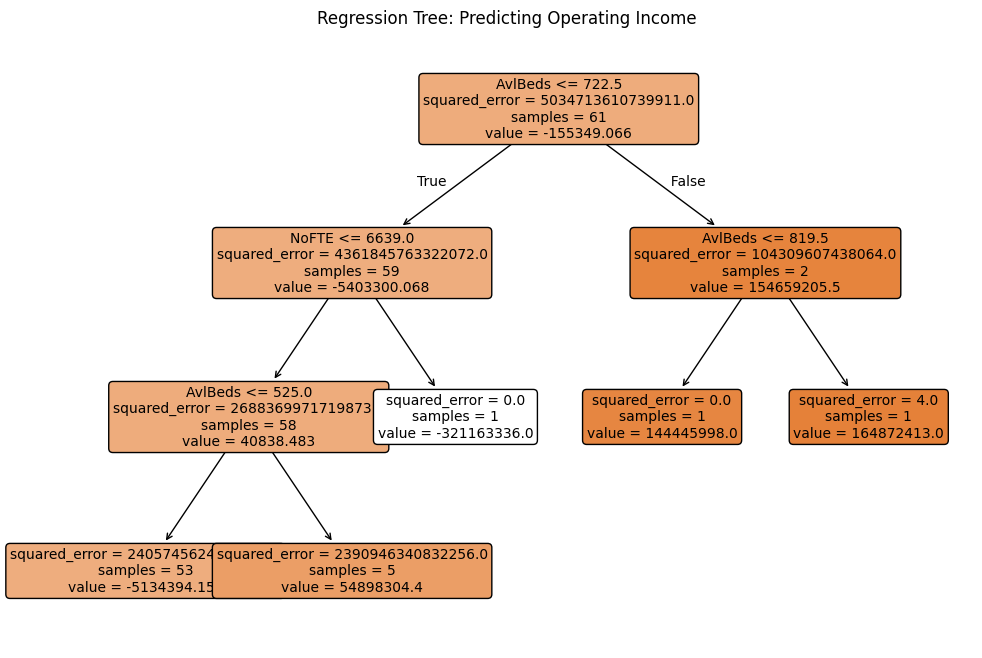

In [30]:
plt.figure(figsize=(12, 8))
plot_tree(
    model_income,
    feature_names=X_income.columns,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Regression Tree: Predicting Operating Income")
plt.show()


### Notes:
This tree splits first on `AvlBeds`, suggesting that hospital capacity is a primary driver of income. Staffing levels (`NoFTE`) add refinement in subsequent branches, but interpretation should remain cautious given the limited dataset.

## Step 3: Regression Tree – Operating Revenue

We predict **Operating Income** using a mix of financial and staffing predictors.  
- **Target**: `OperInc`  
- **Features**: `AvlBeds`, `NoFTE`, `Teaching`  

We include at least one categorical and one numerical variable.
 

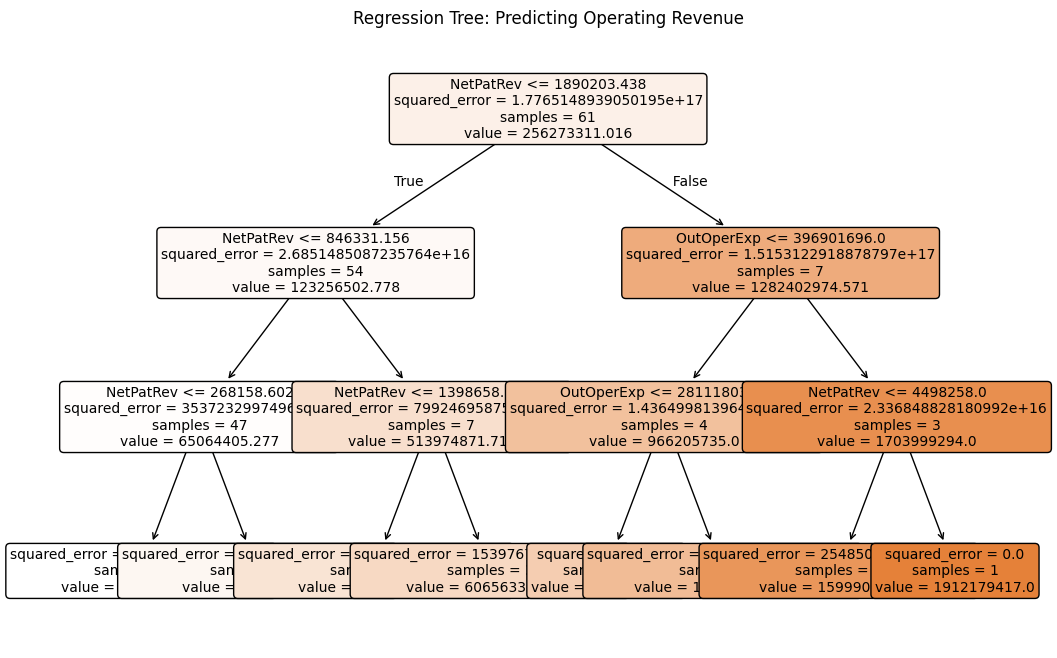

In [26]:
# Select features and prepare dataset
features_rev = ['OutOperExp', 'NetPatRev', 'Teaching']
df_rev = df[features_rev + ['OperRev']].dropna()
df_rev['Teaching'] = df_rev['Teaching'].astype('category')

# Encode categorical feature
X_rev = pd.get_dummies(df_rev[features_rev], drop_first=True)
y_rev = df_rev['OperRev']

# Fit regression tree model
model_rev = DecisionTreeRegressor(max_depth=3, random_state=42)
model_rev.fit(X_rev, y_rev)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(
    model_rev,
    feature_names=X_rev.columns,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Regression Tree: Predicting Operating Revenue")
plt.show()

**Notes:**  
The model highlights `NetPatRev` as the dominant driver of revenue, which aligns with expectations.  
Subsequent splits on `OutOperExp` help refine financial structure differences.




## Step 4: Classification Tree – TypeControl


This classification tree predicts **TypeControl**, which identifies a hospital's management classification.  

- **Target**: `TypeControl`  
- **Features**: `OperRev`, `OperInc`, `DonorType`

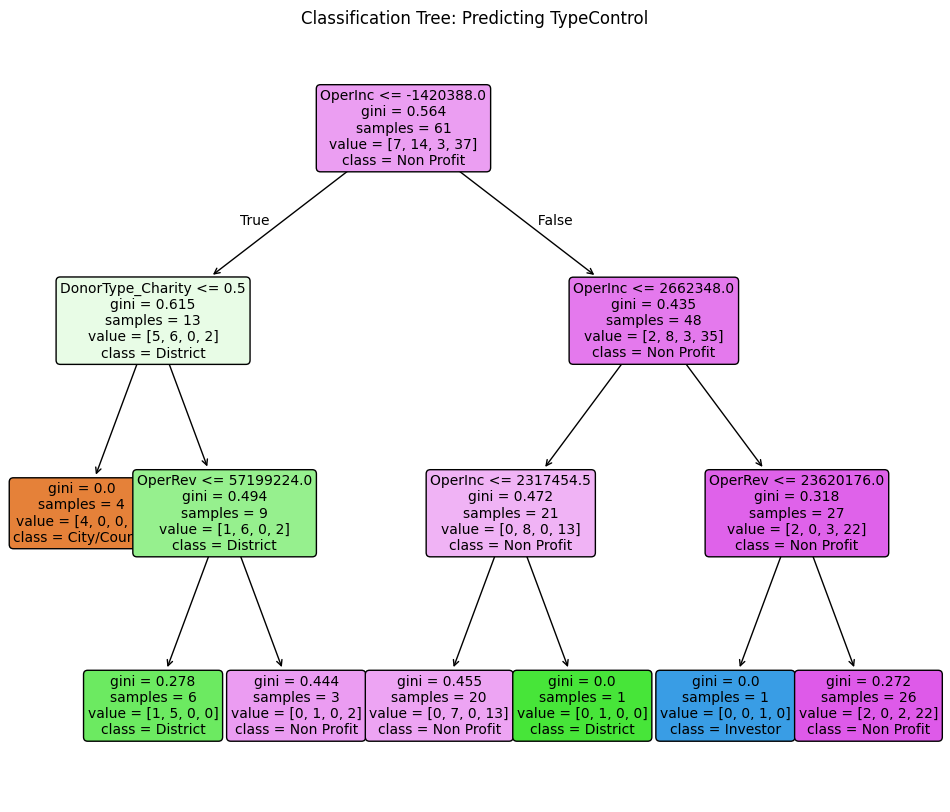

In [31]:
# Select features and prepare dataset
features_tc = ['OperRev', 'OperInc', 'DonorType']
df_tc = df[features_tc + ['TypeControl']].dropna()
df_tc['DonorType'] = df_tc['DonorType'].astype('category')

X_tc = pd.get_dummies(df_tc[features_tc], drop_first=True)
y_tc = df_tc['TypeControl'].astype('category')

# Fit classification tree model
model_tc = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tc.fit(X_tc, y_tc)

# Visualize the tree
plt.figure(figsize=(12, 10))
plot_tree(
    model_tc,
    feature_names=X_tc.columns,
    class_names=model_tc.classes_,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Classification Tree: Predicting TypeControl")  # <-- Add this line for a consistent title
plt.show()


**Notes:**  
Operating and donor characteristics influence hospital classification.  
Higher revenues and certain donor types are more strongly associated with investor or district-level control models.

## Step 5: Classification Tree – DonorType  
This classification tree predicts **DonorType**, categorizing the source of hospital contributions.

- **Target:** `DonorType`  
- **Features:** `NetPatRev`, `Teaching`, `AvlBeds`  

We explore how structural and revenue features shape hospital donor identity.

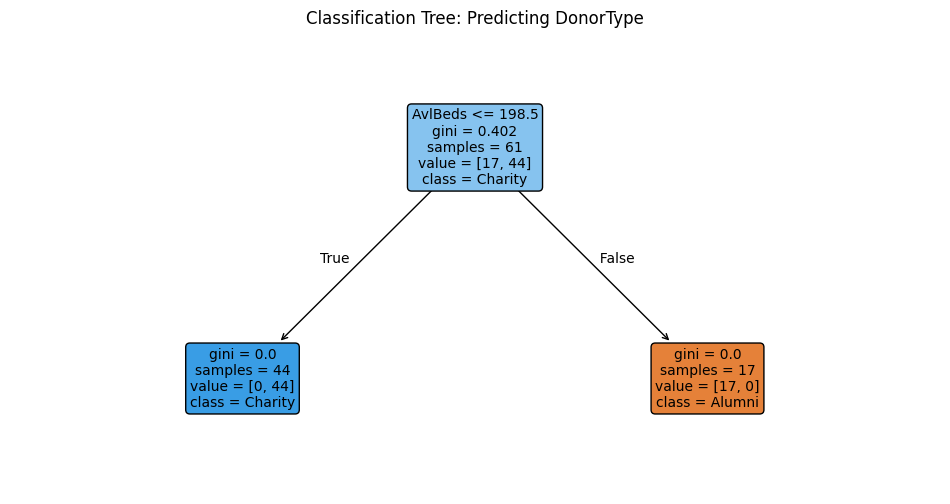

In [33]:
features_donor = ['NetPatRev', 'AvlBeds', 'Teaching']
df_donor = df[features_donor + ['DonorType']].dropna()
df_donor['Teaching'] = df_donor['Teaching'].astype('category')
X_donor = pd.get_dummies(df_donor[features_donor], drop_first=True)
y_donor = df_donor['DonorType'].astype('category')

model_donor = DecisionTreeClassifier(max_depth=3, random_state=42)
model_donor.fit(X_donor, y_donor)

# Reduce figure size to more appropriate dimensions
plt.figure(figsize=(12, 6))
plot_tree(
    model_donor,
    feature_names=X_donor.columns,
    class_names=model_donor.classes_,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Classification Tree: Predicting DonorType")
plt.show()

**Notes:**  
Donor profiles align in part with teaching status and available bed count. Teaching hospitals may attract different donor types depending on their community ties and service profile.

## Final Thoughts

Of the four models, the regression tree for **Operating Revenue** stood out with the clearest and most intuitive splits — anchored by **Net Patient Revenue**, a dominant financial indicator. Trees for **Operating Income**, **DonorType**, and **TypeControl** offered supporting insight into staffing, donor behavior, and governance.

> Teaching status, available bed count, and donor types surfaced as meaningful patterns — but should be interpreted cautiously due to limited sample size.

All trees used a shallow depth (`max_depth=3`) to prioritize interpretability and reduce overfitting, aligning with best practices given the dataset's size (**n = 61** hospitals).

This lab reinforces the value of decision trees for surfacing structure in real-world healthcare data, and demonstrates the power of combining categorical and continuous variables in interpretable ways.



 ## References
 
 - [scikit-learn documentation](https://scikit-learn.org/)
 - Week 10 tutorial and lecture materials – Dr. Olivia Newton
 - California hospital dataset (`week10labs/data/calihospital.txt`)
 - Gemini AI – Clarification and visual interpretation assistance
 
 ---
 
 ## Visual References
 
 <div style="margin-bottom: 30px;">
   <img src="assets/decision_tree_readability_tips.png" width="400" style="display: block;">
   <p>Tips for improving decision tree readability</p>
 </div>
 
 <div style="margin-bottom: 30px;">
   <img src="assets/why_one_hot_encoding_for_decision_trees.png" width="400" style="display: block;">
   <p>Why one-hot encoding is needed for decision trees</p>
 </div>


<hr>

<p><strong>End of Week 10 Independent Lab – Decision Trees</strong></p>

